# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

---

### Simulare la dinamica molecolare

Si studia la dinamica di un ensemble microcanonico determinato da di $N=108$ particelle disposte all'interno di un box con condizioni periodiche al contorno e interagenti entro una distanza di cut-off mediante un potenziale di tipo Lennard-Jones della forma:

$$V(r)=4\epsilon\Bigg[\bigg(\frac{\sigma}{r}\bigg)^{12}-\bigg(\frac{\sigma}{r}\bigg)^6\Bigg].$$

Noto come l'energia potenziale, in questo caso, oltre ad avere una forma complicata, è una funzione delle posizioni delle molecole del sistema. Per questo motivo non esiste una soluzione analitica alle equazioni del moto, e dunque l'unico modo per arrivare ad un risultato è integrarle in modo numerico.

Questo caso di dinamica molecolare viene simulato attraverso l'algoritmo di Verlet, che si basa sull'integrazione delle equazioni del moto per determinare la posizione e la velocità di un certo numero di particelle in un dato istante temporale.

In particolare tale algoritmo computa le posizioni delle particelle come

$$\vec{r}(t+\delta t)=2\vec{r}(t)-\vec{r}(t-\delta t) + \vec{a}(t)\delta t^2\,\,,$$

per cui tale algoritmo non necessita solo delle posizioni attuali, ma anche di quelle dello step precedente.

L'algoritmo di Verlet dunque non utilizza le velocità per computare le posizioni delle particelle passo dopo passo, che vengono calcolate attraverso

$$\vec{v}(t) = \frac{\vec{r}(t+\delta t) - \vec{r}(t-\delta t)}{2\delta t}\,\,,$$

ma queste risultano utili per calcolare l'energia cinetica del sistema, e quindi anche la temperatura.

Le quantità che si vuole calcolare per quanto riguarda la dinamica molecolare in questione, oltre la pressione $P$, sono le seguenti:
- Energia potenziale: $U = 4\sum_{i=1}^{N-1}\sum_{j > i}^N \Big[\Big(\frac{1}{|\vec{r}_i-\vec{r}_j|}\Big)^{12} - \Big(\frac{1}{|\vec{r}_i-\vec{r}_j|}\Big)^{6}\Big]$
- Energia cinetica: $K = \frac{1}{2}\sum_{i=1}^{N} |\vec{v}_i|^2$
- Energia totale: $E= 4U+K$
- Temperatura: $T = \frac{2}{3N}K$

Si deve notare che si stanno considerando unità naturali, per cui $\epsilon, \sigma, m=1$.

E in particolare vengono calcolate le medie e le deviazioni standard progressive di dei singoli contributi delle $N=108$ sulle osservabili particelle all'interno degli $M$ blocchi. Il procedimento per la stima di tali osservabili è il seguente:

1. La configurazione di partenza del singolo blocco è determinata dalle molecole del sistema in uno stato cristallino, e il programma legge da un file esterno le caratteristiche del sistema quali ad esempio il numero di particelle $N$ per blocco, la densità $\rho$ del sistema (da cui si può calcolare il volume del blocco), il passo dell'algoritmo $\delta t$ e la temperatura. Quest'ultima serve per estrarre dalla distribuzione gaussiana $\mathcal{G}(0, T^{1/2})$ le velocità iniziali $\vec{v}(t=0)$ delle particelle. In questo modo si possono calcolare le posizioni di queste al tempo $-\delta t$, in modo da rendere l'algoritmo di Verlet simmetrico temporalmente, attarverso

$$\vec{r}(-\delta t) = \vec{r}(0) - \vec{v}(0)\delta t\,\,.$$

2. Dunque dopo aver misurato le osservabili di partenza, si implementa un passo dell'algoritmo di Verlet, ovvero si computa la forza che il sistema imprime sulla singola particella, determinata dall'opposto del gradiente del potenziale di Lennard-Jones $F=-\nabla V\,\,.$ In questo modo possono essere calcolate le nuove coordinate e le nuove velocità delle particelle come
$$\vec{r}(t+\delta t)=2\vec{r}(t)-\vec{r}(t-\delta t) + \vec{a}(t)\delta t^2\,\,\,\,,\,\,\,\,\vec{v}(t) = \frac{\vec{r}(t+\delta t) - \vec{r}(t-\delta t)}{2\delta t}\,\,.$$


3. Dopodichè, dopo ogni passo si misurano le osservabili e si accumulano in un vettore, da cui poi se ne ricaverà la media dopo un certo numero di passi.


4. Infine, iterando lo stesso procedimento su $M$ blocchi, è possibile calcolare la media progressiva e la deviazione standard progressiva di tutte le osservabili.

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

---

Prima di far procedere con la simulazione vera e propria, che comprende la misura delle osservabili, bisognerebbe abilitare l'algoritmo alla ripartenza dalla configurazione raggiunta nel suo predecente utilizzo in modo tale da poter equilibrare il sistema. Infatti, poiché la configurazione iniziale dell'ensembele microcanonico è determinata da una struttura cristallina, il sistema necessita di una fase di assestamento più o meno lunga, al termine della quale viene raggiunto un equilibrio caratterizzato da una temperatura $T$ in generale leggermente diversa da quella target $T^\star$.
La possibilità di ripartire più volte consente di risolvere questo problema.

Tuttavia può essere scomodo far ripartire l'algoritmo più volte, attendendo che avvenga l'equilibrazione, perciò è bene costruire un metodo <font face="Courier">equilibration()</font> in grado di effettuare l'equilibrazione con un solo avvio dell'algoritmo.

Tale metodo è determinato da un certo numero di passi $n_{eq}$, per cui per ogni passo viene implementato uno step dell'algoritmo di Verlet, in cui calcolo la temperatura istantanea del sistema, per cui dopo un certo numero di passi $n_{sc} < n_{eq}$ avviene un riscalamento delle velocità: si calcola la media di un certo numero di temperature istantanee calcolate in precedenza (che dipende dall'outcome dei risultati), e si definisce il fattore di scala

$$f_{sc} = \sqrt{\frac{T^\star}{\langle T\rangle}}\,\,,$$

per cui la velocità delle particelle viene moltiplicata per tale fattore di scala

$$\vec{v}(t) \rightarrow f_{sc}\vec{v}(t)\,\,,$$

e si ridefiniscono le coordinate $\vec{r}(t-\delta t)$ come

$$\vec{r}(t-\delta t) = \vec{r}(t) - f_{sc}\vec{v}(t)\delta t\,\,,$$

in modo tale che i passi successivi dell'algoritmo di Verlet possano calcolare le nuve posizioni delle particelle, tenendo conto della velocità riscalata.

Per quanto riguarda la fase solida e liquida, essendo caratterizzate da una densità relativamente alta, esse sono tali per cui la configurazione di partenza prevede le particelle posizionate all'interno della buca del potenziale di Lennard-Jones, da cui un passo di Verlet è inizialmente caratterizzato da un aumento dell'energia potenziale, e quindi una diminuzione dell'energia cinetica, che implica una diminuzione anche della temperatura. Per queste due fasi ci si aspetterà dunque un crollo della temperatura durante i primi passi l'equilibrazione.

Per quanto riguarda invece la fase gassosa, essa è caratterizzata da una densità molto bassa rispetto alle altre due fasi, perciò la configurazione di partenza prevede le particelle posizionate all'esterno della buca di potenziale, da cui un passo di Verlet è inizialmente caratterizzato da una diminuzione dell'energia potenziale, e quindi un aumento dell'energia cinetica, che implica un aumento della temperatura. Per questa fase ci si aspetterà dunque una crescita esponenziale della temperatura durante i primi passi dell'equilibrazione.

---

### Fase solida

Per la simulazione della fase solida vengono inizialmente eseguiti $n_{eq}=10000$ step di equilibrazione durante i quali ogni $n_{sc}=500$ passi vengono riscalate le velocità. Nei $n'=500$ step successivi il sistema viene lasciato evolvere senza riscalamenti e alla conclusione di questo processo vengono effettuate le misurazioni. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

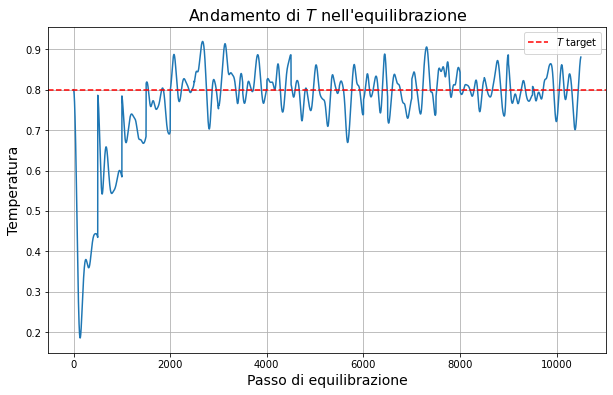

In [2]:
data = np.loadtxt('Solido/temp_eq.dat')
steps = data[:, 0]
temperatures = data[:, 1]

plt.figure(figsize=(10, 6))

plt.plot(steps, temperatures)
plt.xlabel('Passo di equilibrazione', fontsize=14)
plt.ylabel('Temperatura', fontsize=14)
plt.title('Andamento di $T$ nell\'equilibrazione', fontsize=16)
plt.axhline(y=0.8, color='r', linestyle='--', label='$T$ target')
plt.grid(True)
plt.legend()

plt.show()

Si nota che inizialmente il sistema, che parte da una struttura perfettamente cristallina, è soggetto (come ci si aspetta) ad un crollo notevole della temperatura, che poi si stabilizza intorno alla temperatura target $T^\star=0.8$, e rimane compresa nell'intervallo $0.7\leq T \leq 0.9$. Questo è un risultato accettabile poichè si è sicuri che il sistema rimanga nello stato solido.

Le medie e le deviazioni standard progressive delle osservabili nella fase solida che si vuole calcolare sono mostrate nei seguenti grafici, dove esse sono calcolate su $M=100$ blocchi, dove per ogni blocco sono effettuati 2000 passi dell'algoritmo di Verlet.

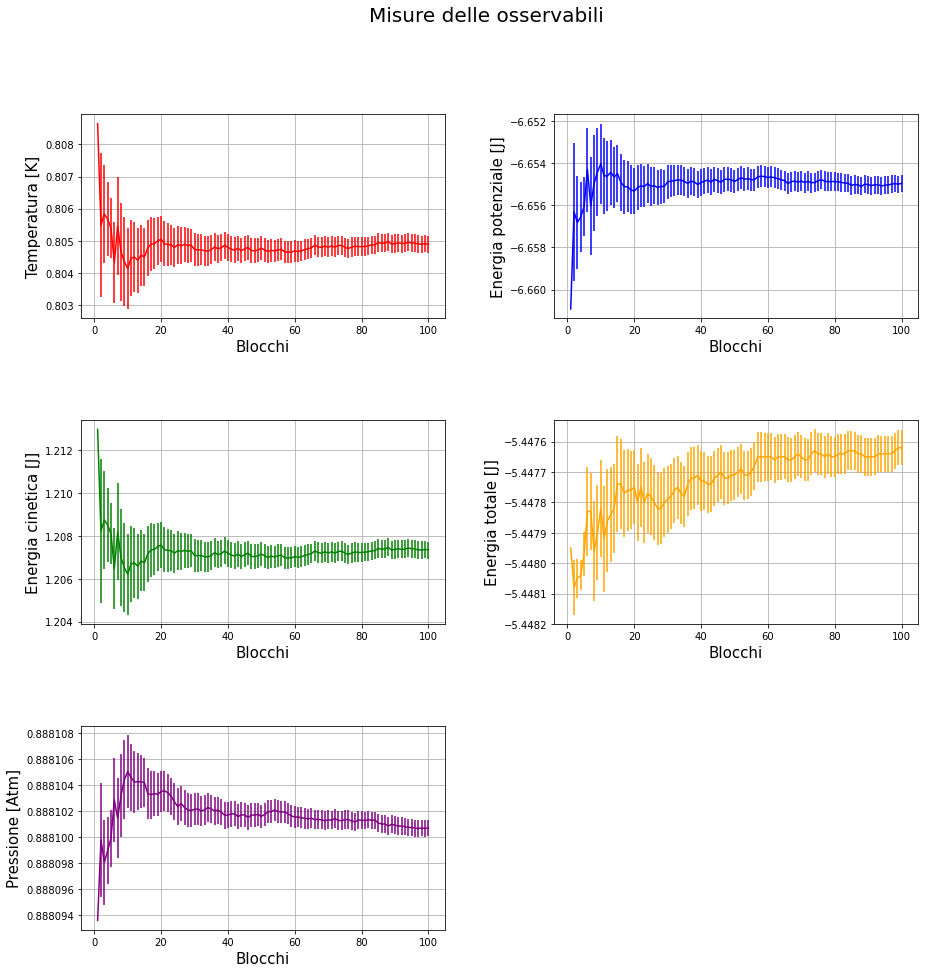

In [3]:
risultati_T = np.loadtxt('Solido/output_temp.dat')
blocchi = risultati_T[:, 0]
medie_T = risultati_T[:, 2]
deviazioni_T = risultati_T[:, 3]

risultati_U = np.loadtxt('Solido/output_epot.dat')
medie_U = risultati_U[:, 2]
deviazioni_U = risultati_U[:, 3]

risultati_K = np.loadtxt('Solido/output_ekin.dat')
medie_K = risultati_K[:, 2]
deviazioni_K = risultati_K[:, 3]

risultati_E = np.loadtxt('Solido/output_etot.dat')
medie_E = risultati_E[:, 2]
deviazioni_E = risultati_E[:, 3]

risultati_P = np.loadtxt('Solido/output_pres.dat')
medie_P = risultati_P[:, 2]
deviazioni_P = risultati_P[:, 3]

# Creazione dei grafici a due a due
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Misure delle osservabili', fontsize=20)

axs[0, 0].errorbar(blocchi, medie_T, yerr=deviazioni_T, color='red')
axs[0, 0].set_xlabel('Blocchi', fontsize=15)
axs[0, 0].set_ylabel('Temperatura [K]', fontsize=15)
axs[0, 0].grid(True)

axs[0, 1].errorbar(blocchi, medie_U, yerr=deviazioni_U, color='blue')
axs[0, 1].set_xlabel('Blocchi', fontsize=15)
axs[0, 1].set_ylabel('Energia potenziale [J]', fontsize=15)
axs[0, 1].grid(True)

axs[1, 0].errorbar(blocchi, medie_K, yerr=deviazioni_K, color='green')
axs[1, 0].set_xlabel('Blocchi', fontsize=15)
axs[1, 0].set_ylabel('Energia cinetica [J]', fontsize=15)
axs[1, 0].grid(True)

axs[1, 1].errorbar(blocchi, medie_E, yerr=deviazioni_E, color='orange')
axs[1, 1].set_xlabel('Blocchi', fontsize=15)
axs[1, 1].set_ylabel('Energia totale [J]', fontsize=15)
axs[1, 1].grid(True)

axs[2, 0].errorbar(blocchi, medie_P, yerr=deviazioni_P, color='purple')
axs[2, 0].set_xlabel('Blocchi', fontsize=15)
axs[2, 0].set_ylabel('Pressione [Atm]', fontsize=15)
axs[2, 0].grid(True)

# Rimuovo il sottoplot vuoto
fig.delaxes(axs[2, 1])

# Regolo del layout
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

Si nota come effettuando l'equilibrazione la media della temperatura dell'Argon solido, pur non essendo compatibile con la temperatura target $T^\star = 0.8$, lo è entro un termine 0.1, il che può essere considerato accettabile. Inoltre anche le fluttuazioni osservate per tutte le altre osservabili possono essere accettate, visto che esse sono comprese all'interno della loro incertezza statistica.

---

### Fase liquida

Per la simulazione della fase liquida vengono inizialmente eseguiti $n_{eq}=10000$ step di equilibrazione durante i quali ogni $n_{sc}=500$ passi vengono riscalate le velocità. Nei $n'=500$ step successivi il sistema viene lasciato evolvere senza riscalamenti e alla conclusione di questo processo vengono effettuate le misurazioni. 

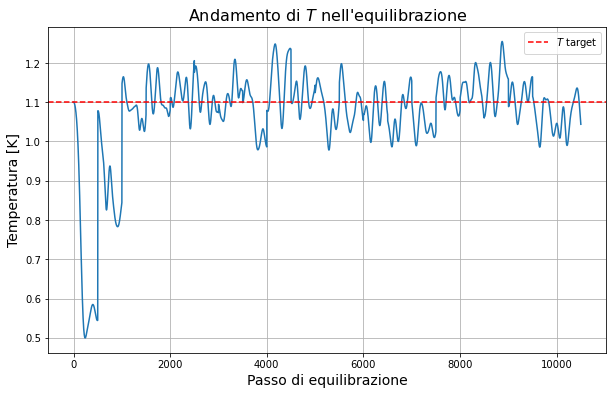

In [4]:
data = np.loadtxt('Liquido/temp_eq.dat')
steps = data[:, 0]
temperatures = data[:, 1]

plt.figure(figsize=(10, 6))

plt.plot(steps, temperatures)
plt.xlabel('Passo di equilibrazione', fontsize=14)
plt.ylabel('Temperatura [K]', fontsize=14)
plt.title('Andamento di $T$ nell\'equilibrazione', fontsize=16)
plt.axhline(y=1.1, color='r', linestyle='--', label='$T$ target')
plt.grid(True)
plt.legend()

plt.show()

anche in questo caso si può notare come il sistema sia soggetto ad un crollo della temperatura iniziale, che poi tende a stabilizzarsi intorno alla temperatura target $T^\star=1.1$, stando approssivativamente nell'intervallo
$1\leq T \leq 1.2$.

Le medie e le deviazioni standard progressive delle osservabili nella fase liquida che si vuole calcolare sono mostrate nei seguenti grafici, dove esse sono calcolate su $M=100$ blocchi, dove per ogni blocco sono effettuati 2000 passi dell'algoritmo di Verlet.

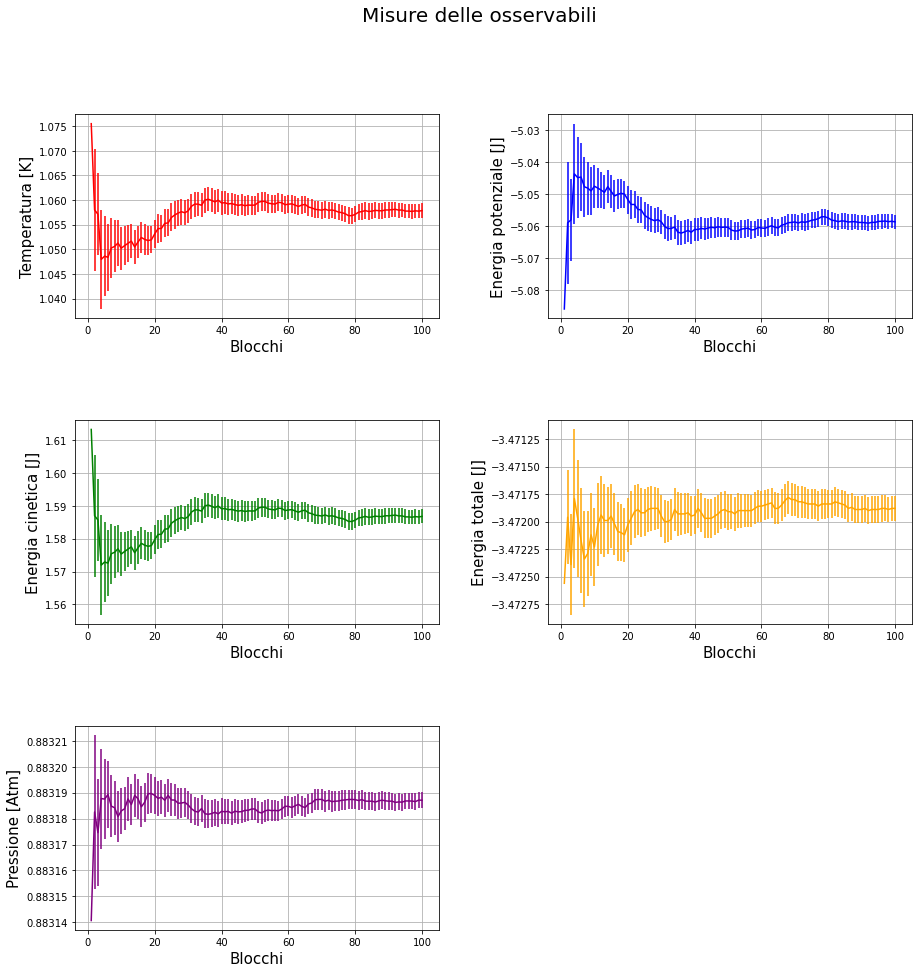

In [5]:
risultati_T = np.loadtxt('Liquido/output_temp.dat')
blocchi = risultati_T[:, 0]
medie_T = risultati_T[:, 2]
deviazioni_T = risultati_T[:, 3]

risultati_U = np.loadtxt('Liquido/output_epot.dat')
medie_U = risultati_U[:, 2]
deviazioni_U = risultati_U[:, 3]

risultati_K = np.loadtxt('Liquido/output_ekin.dat')
medie_K = risultati_K[:, 2]
deviazioni_K = risultati_K[:, 3]

risultati_E = np.loadtxt('Liquido/output_etot.dat')
medie_E = risultati_E[:, 2]
deviazioni_E = risultati_E[:, 3]

risultati_P = np.loadtxt('Liquido/output_pres.dat')
medie_P = risultati_P[:, 2]
deviazioni_P = risultati_P[:, 3]

# Creazione dei grafici a due a due
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Misure delle osservabili', fontsize=20)

axs[0, 0].errorbar(blocchi, medie_T, yerr=deviazioni_T, color='red')
axs[0, 0].set_xlabel('Blocchi', fontsize=15)
axs[0, 0].set_ylabel('Temperatura [K]', fontsize=15)
axs[0, 0].grid(True)

axs[0, 1].errorbar(blocchi, medie_U, yerr=deviazioni_U, color='blue')
axs[0, 1].set_xlabel('Blocchi', fontsize=15)
axs[0, 1].set_ylabel('Energia potenziale [J]', fontsize=15)
axs[0, 1].grid(True)

axs[1, 0].errorbar(blocchi, medie_K, yerr=deviazioni_K, color='green')
axs[1, 0].set_xlabel('Blocchi', fontsize=15)
axs[1, 0].set_ylabel('Energia cinetica [J]', fontsize=15)
axs[1, 0].grid(True)

axs[1, 1].errorbar(blocchi, medie_E, yerr=deviazioni_E, color='orange')
axs[1, 1].set_xlabel('Blocchi', fontsize=15)
axs[1, 1].set_ylabel('Energia totale [J]', fontsize=15)
axs[1, 1].grid(True)

axs[2, 0].errorbar(blocchi, medie_P, yerr=deviazioni_P, color='purple')
axs[2, 0].set_xlabel('Blocchi', fontsize=15)
axs[2, 0].set_ylabel('Pressione [Atm]', fontsize=15)
axs[2, 0].grid(True)

# Rimuovo il sottoplot vuoto
fig.delaxes(axs[2, 1])

# Regolazione del layout
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

Si nota come effettuando l'equilibrazione la media della temperatura dell'Argon liquido, pur non essendo compatibile con la temperatura target $T^\star = 1.1$, lo è entro un termine 0.1, il che può essere considerato accettabile. Inoltre anche le fluttuazioni osservate per tutte le altre osservabili possono essere accettate, visto che esse sono comprese all'interno della loro incertezza statistica.

---

### Fase gassosa

Per la simulazione della fase gassosa vengono inizialmente eseguiti $n_{eq}=50000$ step di equilibrazione durante i quali ogni $n_{sc}=1000$ passi vengono riscalate le velocità. Nei $n'=1000$ step successivi il sistema viene lasciato evolvere senza riscalamenti e alla conclusione di questo processo vengono effettuate le misurazioni.

In questo caso sono necessari più step di equilibrazione, in cui i rescaling delle velocità avvengono dopo un periodo di tempo più lungo rispetto alla fase solida e gassosa, perchè la fase liquida ha bisogno di un tempo di assestamento più lungo.

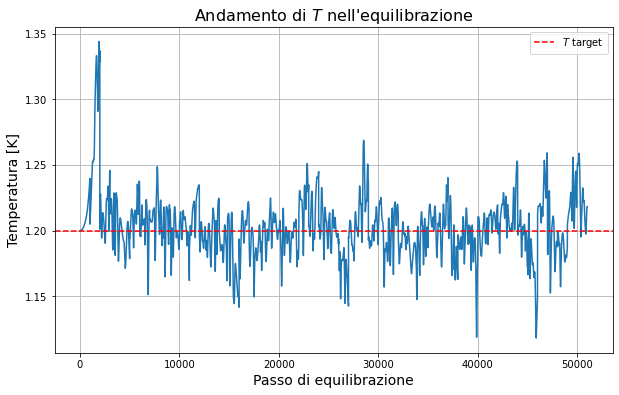

In [6]:
data = np.loadtxt('Gas/temp_eq.dat')
steps = data[:, 0]
temperatures = data[:, 1]

plt.figure(figsize=(10, 6))

plt.plot(steps, temperatures)
plt.xlabel('Passo di equilibrazione', fontsize=14)
plt.ylabel('Temperatura [K]', fontsize=14)
plt.title('Andamento di $T$ nell\'equilibrazione', fontsize=16)
plt.axhline(y=1.2, color='r', linestyle='--', label='$T$ target')
plt.grid(True)
plt.legend()

plt.show()

In questo caso si nota come, a differenza della fase solida e della fase liquida, la temperatura non è soggetta ad un crollo iniziale, ma ad una rapida crescita, fino a stabilizzarsi in un intorno della temperatura target $T^\star=1.2$. Ciò, come è già stato detto precedentemente, è dovuto al fatto che nella configurazione iniziale, a differenza della fase solida e liquida, la fase gasso sa è determinata da una densità molto bassa, per cui un passo dell'algoritmo di Verlet nelle fasi iniziali è caratterizzato dalla diminuzione dell'energia potenziale (per la singola particella), e quindi da un aumento dell'energia cinetica, che implica un aumento della velocità.

Le medie e le deviazioni standard progressive delle osservabili nella fase gassosa che si vuole calcolare sono mostrate nei seguenti grafici, dove esse sono calcolate su $M=100$ blocchi, dove per ogni blocco sono effettuati 2000 passi dell'algoritmo di Verlet.

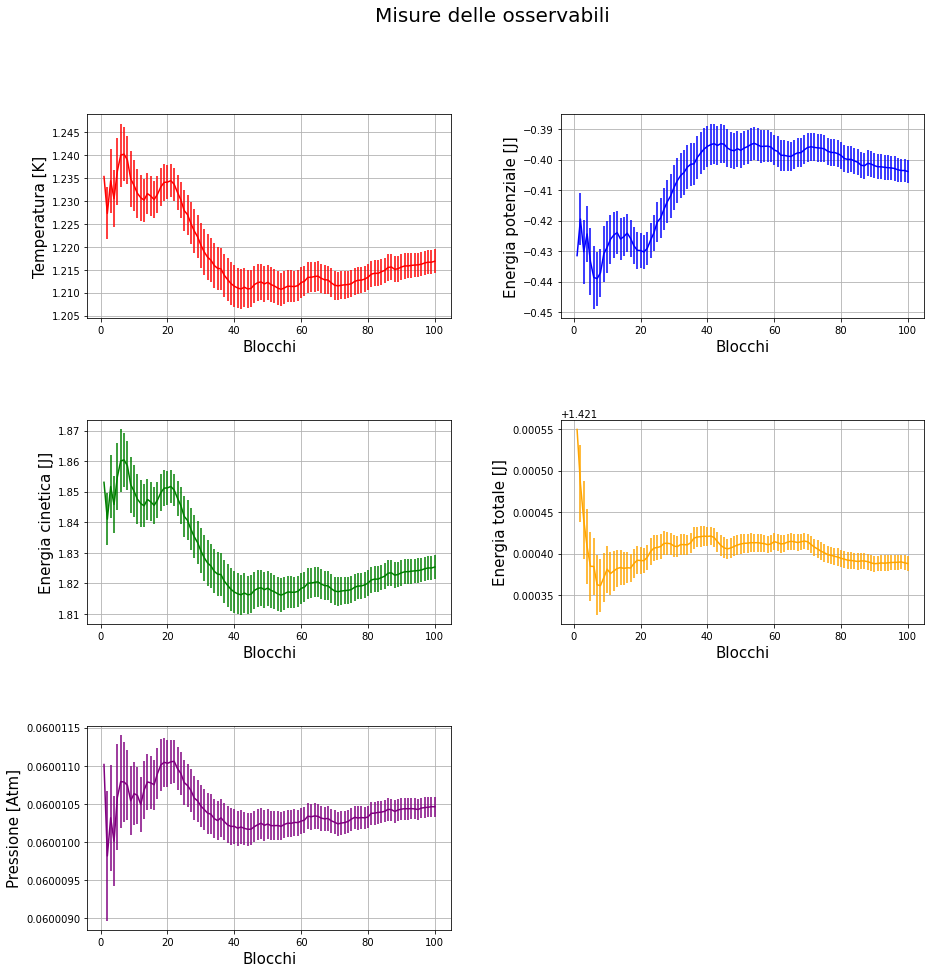

In [7]:
risultati_T = np.loadtxt('Gas/output_temp.dat')
blocchi = risultati_T[:, 0]
medie_T = risultati_T[:, 2]
deviazioni_T = risultati_T[:, 3]

risultati_U = np.loadtxt('Gas/output_epot.dat')
medie_U = risultati_U[:, 2]
deviazioni_U = risultati_U[:, 3]

risultati_K = np.loadtxt('Gas/output_ekin.dat')
medie_K = risultati_K[:, 2]
deviazioni_K = risultati_K[:, 3]

risultati_E = np.loadtxt('Gas/output_etot.dat')
medie_E = risultati_E[:, 2]
deviazioni_E = risultati_E[:, 3]

risultati_P = np.loadtxt('Gas/output_pres.dat')
medie_P = risultati_P[:, 2]
deviazioni_P = risultati_P[:, 3]

# Creazione dei grafici a due a due
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Misure delle osservabili', fontsize=20)

axs[0, 0].errorbar(blocchi, medie_T, yerr=deviazioni_T, color='red')
axs[0, 0].set_xlabel('Blocchi', fontsize=15)
axs[0, 0].set_ylabel('Temperatura [K]', fontsize=15)
axs[0, 0].grid(True)

axs[0, 1].errorbar(blocchi, medie_U, yerr=deviazioni_U, color='blue')
axs[0, 1].set_xlabel('Blocchi', fontsize=15)
axs[0, 1].set_ylabel('Energia potenziale [J]', fontsize=15)
axs[0, 1].grid(True)

axs[1, 0].errorbar(blocchi, medie_K, yerr=deviazioni_K, color='green')
axs[1, 0].set_xlabel('Blocchi', fontsize=15)
axs[1, 0].set_ylabel('Energia cinetica [J]', fontsize=15)
axs[1, 0].grid(True)

axs[1, 1].errorbar(blocchi, medie_E, yerr=deviazioni_E, color='orange')
axs[1, 1].set_xlabel('Blocchi', fontsize=15)
axs[1, 1].set_ylabel('Energia totale [J]', fontsize=15)
axs[1, 1].grid(True)

axs[2, 0].errorbar(blocchi, medie_P, yerr=deviazioni_P, color='purple')
axs[2, 0].set_xlabel('Blocchi', fontsize=15)
axs[2, 0].set_ylabel('Pressione [Atm]', fontsize=15)
axs[2, 0].grid(True)

# Rimuovo il sottoplot vuoto
fig.delaxes(axs[2, 1])

# Regolazione del layout
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

Si nota come effettuando l'equilibrazione la media della temperatura dell'Argon gassoso, pur non essendo compatibile con la temperatura target $T^\star = 1.2$, lo è entro un termine 0.1, il che può essere considerato accettabile. Inoltre anche le fluttuazioni osservate per tutte le altre osservabili possono essere accettate, visto che esse sono comprese all'interno della loro incertezza statistica.